# Predecting the possibility of Heart Attack

In [1]:
#necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(color_codes=True)
sns.set_theme(font_scale=10.5)
sns.set(rc={'figure.figsize':(15,15)})

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
heart = pd.read_csv('./kaggle/heart.csv')

In [8]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#1.Age
#2.Sex
#3.chest pain type (4 values)
#4.resting blood pressure
#5.serum cholestoral in mg/dl
#6.fasting blood sugar > 120 mg/dl
#7.resting electrocardiographic results (values 0,1,2)
#8.maximum heart rate achieved
#9.exercise induced angina
#10.oldpeak = ST depression induced by exercise relative to rest
#11.the slope of the peak exercise ST segment
#12.number of major vessels (0-3) colored by flourosopy
#13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
#14.target: 0= less chance of heart attack 1= more chance of heart attack

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
print("Maximum and Minimum Cholesterol from Data respectively:",(heart['chol'].max(),heart['chol'].min()))

Maximum and Minimum Cholesterol from Data respectively: (564, 126)


In [12]:
female = heart['sex']==0


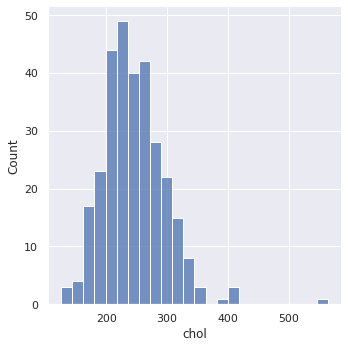

In [13]:
ax = sns.displot(heart,
                 x=heart['chol'])

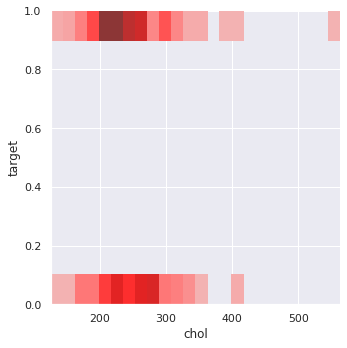

In [14]:
ax = sns.displot(
    heart,
    x='chol',
    y='target',
    color='red'
)
#persons with cholesterol above 400 having higher chances of heart attack

In [15]:
independent_variables = heart.iloc[:,0:13]

In [16]:
independent_variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
dependent_variable = heart.iloc[:,13:]

In [18]:
corrmatrix = heart.corr()

In [19]:
corrmatrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [20]:
# negatively correlated and positively correlated features with target can be seen clearly through correlation matrix

Text(0.5, 1, 'Correlation between the features and the target')

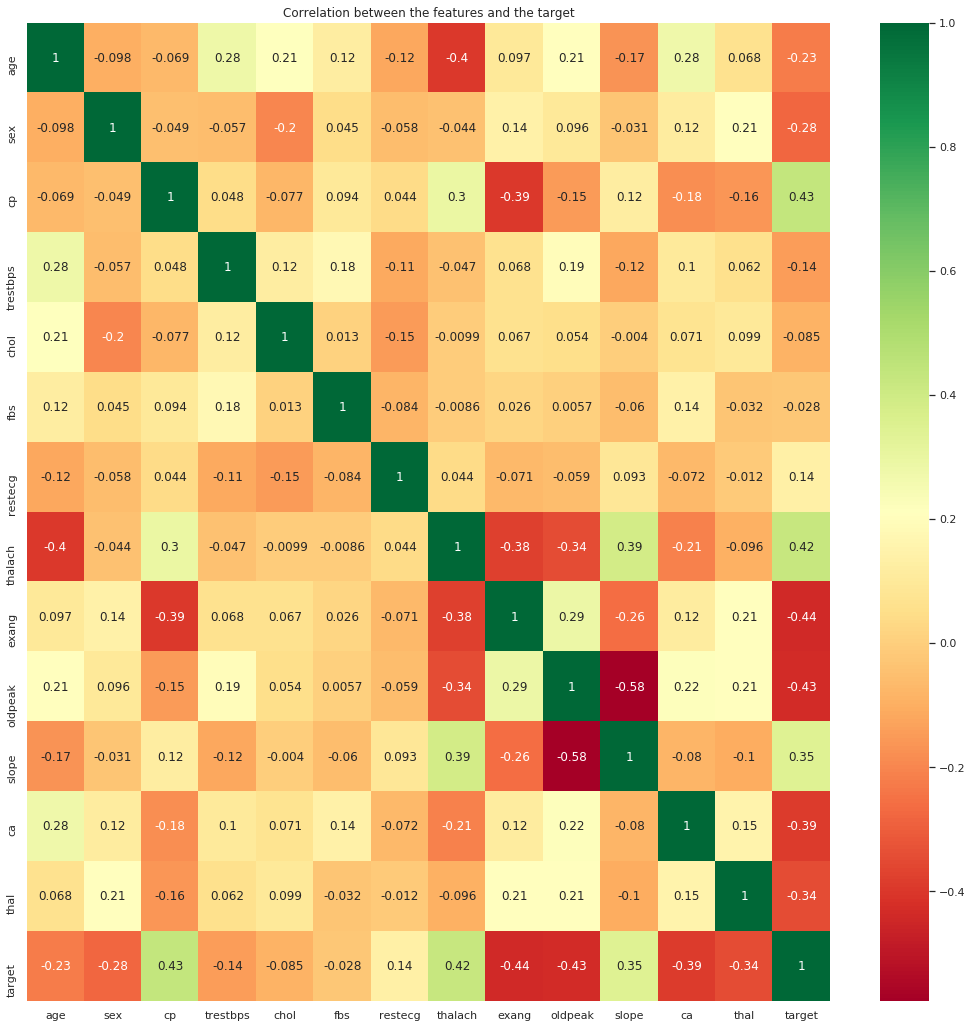

In [21]:
plt.figure(figsize=(18,18))
#plotting the heat map
p = sns.heatmap(corrmatrix, annot=True, cmap = 'RdYlGn')
plt.title("Correlation between the features and the target")

In [22]:
#just for seeing how are these 3 features ranging with each other
chol_age_sex ={
 'chol':heart['chol'],
    'age':heart['age'],
    'sex':heart['sex'],
    'target':heart['target']

}

In [23]:
chol_age_sex = pd.DataFrame(chol_age_sex,columns=['chol','age','sex','target'])

In [24]:
chol_age_sex

,chol,age,sex,target
0,233,63,1,1
1,250,37,1,1
2,204,41,0,1
3,236,56,1,1
4,354,57,0,1
...,...,...,...,...
298,241,57,0,0
299,264,45,1,0
300,193,68,1,0
301,131,57,1,0


In [25]:
chol_age_sex_corrmat = chol_age_sex.corr()

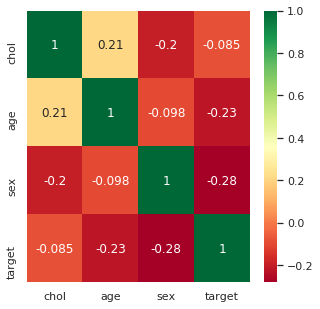

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(chol_age_sex_corrmat,annot=True, cmap='RdYlGn')


In [27]:
y = heart['target']
X = heart.drop('target',axis=1)

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y = heart['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


# Logistic Regression

In [33]:
clf = LogisticRegression()

In [34]:
clf.fit(X_train,y_train)

LogisticRegression()

In [35]:
prediction = clf.predict(X_test)

In [36]:
confus_matrix = confusion_matrix(y_test, prediction)
clf_report = classification_report(y_test, prediction)
accur_score = accuracy_score(y_test, prediction)
print("**Accuracy acchieved using Logistic Regression:", accur_score*100)
print("**Classification report:")
print(clf_report)

**Accuracy acchieved using Logistic Regression: 85.24590163934425
**Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# KNeighborsClassifier

In [37]:
#Applying KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
confus_matrix_knn = confusion_matrix(prediction_knn, y_test)
acc_score_knn = accuracy_score(prediction_knn, y_test)
clf_report_knn = classification_report(prediction_knn, y_test)
print("**Accuracy acchieved using KNeigborsClassifier:", acc_score_knn*100)
print("**Classification report:")
print(clf_report_knn)

**Accuracy acchieved using KNeigborsClassifier: 88.52459016393442
**Classification report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [39]:
print("**Accuracy acchieved using KNeigborsClassifier when 11 neighbors tested:", acc_score_knn*100)

**Accuracy acchieved using KNeigborsClassifier when 11 neighbors tested: 88.52459016393442


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [41]:
knn_cv.best_score_

0.6834408602150538

In [42]:
knn_cv.best_params_

{'n_neighbors': 29}

In [43]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
confus_matrix_knn = confusion_matrix(prediction_knn, y_test)
acc_score_knn = accuracy_score(prediction_knn, y_test)
clf_report_knn = classification_report(prediction_knn, y_test)
print("**Accuracy acchieved using KNeigborsClassifier:", acc_score_knn*100)
print("**Classification report:")
print(clf_report_knn)

**Accuracy acchieved using KNeigborsClassifier: 88.52459016393442
**Classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [44]:
print("**Accuracy acchieved using KNeigborsClassifier when 29 neighbors tested:", acc_score_knn*100)

**Accuracy acchieved using KNeigborsClassifier when 29 neighbors tested: 88.52459016393442


# ChiSquare (For Selecting Best Features)

In [45]:
# just for observation for deciding which are best features describing prediction
#chi2
from sklearn.feature_selection import SelectKBest, chi2

In [46]:
best_features = SelectKBest(score_func = chi2 , k = 5)

In [47]:
fit = best_features.fit(X,y)

In [48]:
fitscoreDataframe = pd.DataFrame(fit.scores_)

In [49]:
featureDataframe = pd.DataFrame(X.columns)

In [50]:
featurescores = pd.concat([featureDataframe,fitscoreDataframe],axis=1)

In [51]:
featurescores.columns = ['Specs','Score']

In [52]:
featurescores

,Specs,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalach,188.320472
8,exang,38.914377
9,oldpeak,72.644253


In [53]:
featurescores.nlargest(5,'Score')

,Specs,Score
7,thalach,188.320472
9,oldpeak,72.644253
11,ca,66.440765
2,cp,62.598098
8,exang,38.914377
